In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import time



---
**1-е задание**
---

---







1) Реализовать генератор схемы Бернулли с заданной вероятностью успеха p. На основе генератора схемы Бернулли построить датчик для биномиального распределения.


In [ ]:
def gen_Bernoulli(p: float = 0.5, size = 1):
  if p < 0 or p > 1:
    raise ValueError("p must be a positive integer between 0 and 1")
  value = (np.random.random(size) < p).astype(int)

  return value
def gen_Binomial(n: int, p: float, size = 1):
  if isinstance(size, int):
    size = [size]
  size.append(n)
  value = np.sum(gen_Bernoulli(p, size), axis = len(size) - 1)

  return value


In [ ]:
gen_Bernoulli(0.5, [2, 2])

array([[1, 0],
       [1, 1]])

In [ ]:
gen_Binomial(5, 0.1, [3,3,3])

array([[[0, 0, 2],
        [0, 0, 1],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 0, 0],
        [2, 1, 0]],

       [[1, 0, 0],
        [1, 0, 1],
        [0, 0, 0]]])

2)Реализовать генератор геометрического распределения. Проверить для данного распределения свойство отсутствия памяти.

In [ ]:
def gen_Geom(p: float, size = 1):
  n = int(1/p**2) * 2
  if isinstance(size, int):
    size = [size]
  size.append(n)
  gen = gen_Bernoulli(p, size)
  #на случай если не все попытки имеют успех (надеюсь не очень плохо)
  while not (np.sum(gen, axis = len(size) - 1)).all():
    n = n + 4
    size[-1] = n
    gen = gen_Bernoulli(p, size)

  value = (gen != 0).argmax(axis = len(size) - 1)+1

  return value

In [ ]:
gen_Geom(0.05, [3,3,3])

array([[[ 73,  16,  58],
        [ 41, 124,   3],
        [ 30,   9,  28]],

       [[ 20,  10,   6],
        [ 14,   9,   6],
        [  9,  25,  79]],

       [[  3,   5,   7],
        [  3,   6,  14],
        [ 14,  53,  53]]])

In [ ]:
def plot_distribution(x, y, border, case = 'First successful attempt'):
    fig, ax = plt.subplots()
    ax.bar(x, y / np.sum(y), label=f'p={p}')
    ax.set_xlabel(case)
    ax.set_ylabel('Empirical probability function')
    plt.xlim([0, border])
    plt.legend()
    plt.show()

In [ ]:
p = 0.1
n = 1000000
res = gen_Geom(p, n)

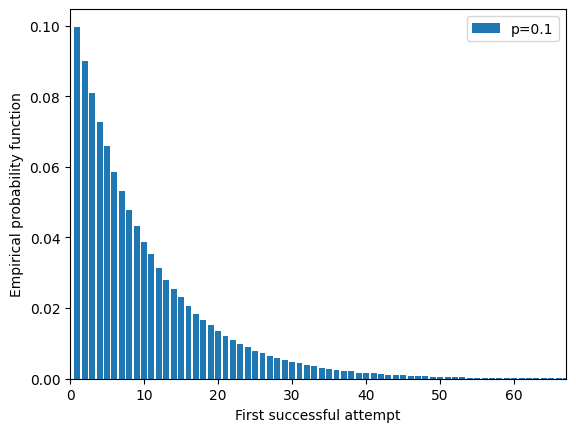

In [ ]:
x1, y1 = np.unique(res, return_counts=True)
plot_distribution(x1, y1, x1[(y1 / np.sum(y1)<0.0001).argmax()])

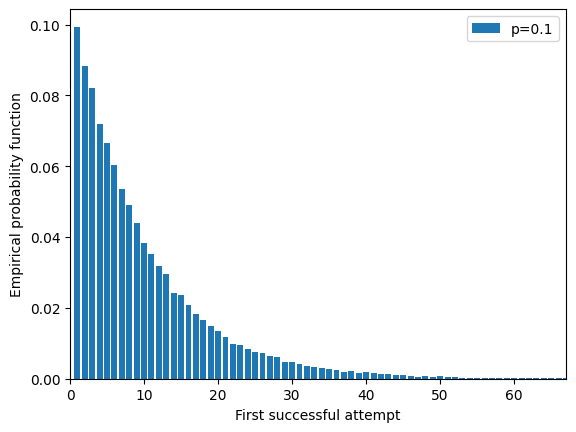

In [ ]:

Fails = 25
new_res = np.sort(res)
index = (new_res <= Fails).argmin()

new_res = new_res[index:]
x2, y2 = np.unique(new_res, return_counts=True)
x2 -= Fails
plot_distribution(x2, y2, x1[(y1 / np.sum(y1)<0.0001).argmax()])

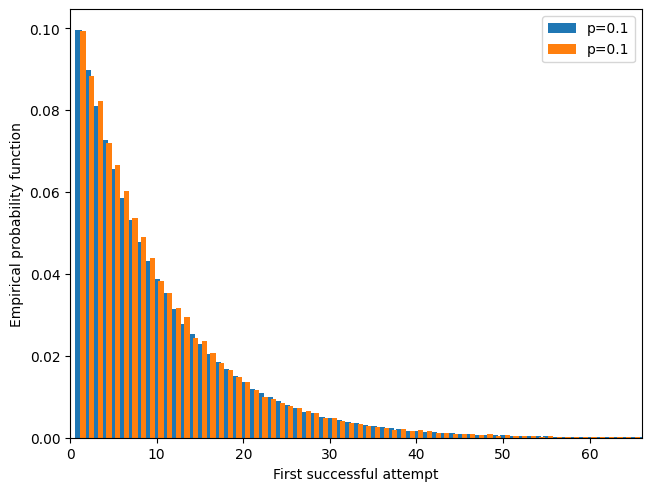

In [ ]:
fig, ax = plt.subplots(layout='constrained')
ax.bar(x1, y1 / n, label=f'p={p}')
ax.bar(x2 + 0.5, y2 / len(new_res), label=f'p={p}', width=0.6)
ax.set_xlabel('First successful attempt')
ax.set_ylabel('Empirical probability function')
plt.xlim([0, (y1 / n >= 0.0001).argmin()])
plt.legend()

3) Рассмотреть игру в орлянку - бесконечную последовательность независимых испытаний с бросанием правильной монеты. Выигрыш $S_n$ определяется как сумма по всем $n$ испытаниям значений $1$ и $-1$ в зависимости от выпавшей стороны. Проиллюстрировать (в виде ломаной) поведение нормированной суммы $Y(i) = S_i/\sqrt{n}$ как функцию от номера испытания $i = 1\ldots n$ для отдельно взятой траектории. Дать теоретическую оценку $Y(n)$ при $n\to \infty$.

In [ ]:
n = 10000
np.arange(n) + 1
res = np.sum(np.repeat([gen_Bernoulli(size = n)*2 - 1], repeats = n, axis=0)* np.tri(n), axis = 1)/ np.sqrt(n)


Text(0, 0.5, 'Normalized Sum')

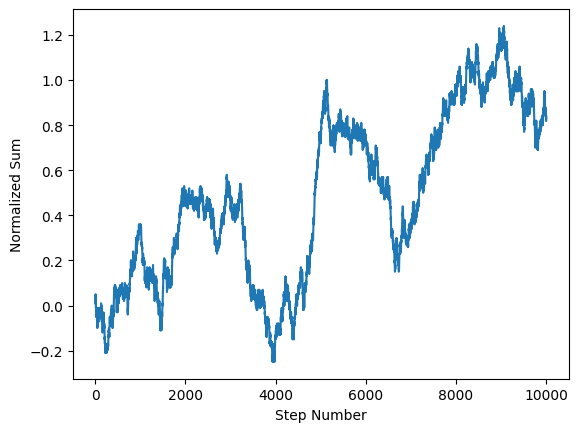

In [ ]:
x = np.arange(n) + 1
plt.plot(x, res)
plt.xlabel('Step Number')
plt.ylabel('Normalized Sum')


---
**2-е задание**
---

---



1)Построить датчик сингулярного распределения, имеющий в качестве функции распределения канторову лестницу.

Заметим, что Канторово множество C может быть определено как множество чисел от нуля до единицы, которые можно представить в троичной записи с помощью только нулей и двоек.

Из этого соображения можно сделать следующий вывод:

$$
X = \sum_{k=1}^{∞} \frac {2\xi_k}{3^k},
$$
Где  $\ \xi_k$ ~ $Bern(0.5)$

In [ ]:
def gen_Cantor(n: int = 1, num_steps: int = 25):
    n = int(n)
    size = [n, num_steps]
    if n <= 0:
        raise ValueError("n must be a positive integer.")
    matrix = gen_Bernoulli(size = size)
    degrees = (-1) * (np.arange(num_steps) + 1)
    res = np.sum(2 * matrix * np.power(np.ones(num_steps) * 3, degrees), axis = 1)
    cantor = np.sum(matrix * np.power(np.ones(num_steps) * 2, degrees), axis=1)
    return res, cantor

In [ ]:
n = 1000000
x, y = gen_Cantor(n,30)
x.sort()
y.sort()

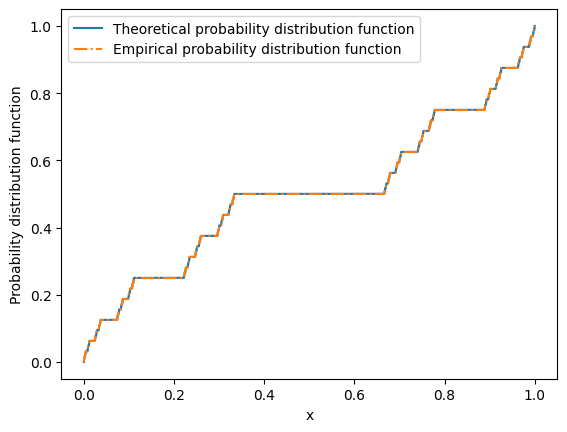

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, label='Theoretical probability distribution function')
ax.plot(x, (np.arange(n) + 1) / n, '-.', label='Empirical probability distribution function')
ax.set_xlabel('x')
ax.set_ylabel('Probability distribution function')
plt.legend()

С помощью критерия Колмогорова убедиться в корректности работы датчика.
$$F_k(x) = 1 + 2\sum_{k=1}^{+∞}(-1)^k*e^{-2k^2x^2}$$

In [ ]:
def criterion_Kolmogorov(y1, y2):
    alpha = 0.05
    n = y1.shape[0]
    dn = np.max(np.abs(y1 - y2))
    num_step = 50
    x = np.sqrt(n) * dn
    F = 1 + 2 * np.sum(np.power(np.ones(num_step) * -1, np.arange(num_step) + 1) * np.exp(-2 * np.power(np.arange(1, num_step + 1), 2) * x**2))
    p_Value = 1 - F

    return p_Value > alpha

In [ ]:
alpha = 0.05
criterion_Kolmogorov(y, (np.arange(n) + 1) / n)

True

2) Для канторовых случайных величин проверить свойство симметричности относительно $\frac{1}{2}$ ($X$ и $1-X$ распределены одинаково) и самоподобия относительно деления на 3 (условное распределение $Y$ при условии $Y \in [0, 1/3]$ совпадает с распределением $\frac{Y}{3}$) с помощью критерия Смирнова.

Очевидно что:
 $$ 1 - X = 1 - \sum_{k=1}^{∞} \frac {2\xi_k}{3^k} = \sum_{k=1}^{∞} \frac {2}{3^k} - \sum_{k=1}^{∞} \frac {2\xi_k}{3^k} = \sum_{k=1}^{∞} \frac {2\eta_k}{3^k}  \sim Cantor$$ Где $\eta$  ~ $Bern(0.5)$

In [ ]:
n = 1000000
x1, y1 = gen_Cantor(n)
x2 = 1 - x1
x1.sort()
y1.sort()
x2.sort()
y2 = (np.arange(n) + 1) / n

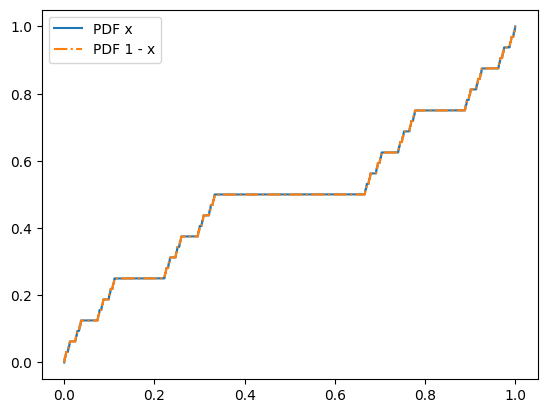

In [ ]:
fig, ax = plt.subplots()
ax.plot(x1, y1, label='PDF x')
ax.plot(x2, y2, '-.', label='PDF 1 - x')
plt.legend()

In [ ]:
x3 = x1[np.where(x1 < 1/3)]
y3 = (np.arange(x3.shape[0]) + 1) / x3.shape[0]
x4 = x1/3
y4 = y1

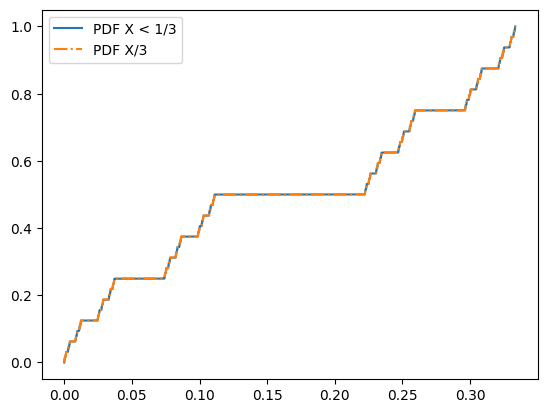

In [ ]:
fig, ax = plt.subplots()
ax.plot(x3, y3, label='PDF X < 1/3')
ax.plot(x4, y4, '-.', label='PDF X/3')
plt.legend()

критерий Смирнова:

In [ ]:
alpha = 0.05
# устраняем различия в размерности распределений
y4 = y4[np.where(x1 < 1/3)] / y4[np.where(x1 < 1/3)[0].shape[0]]
criterion_Kolmogorov(y3, y4)

True

3) Вычислить значение математического ожидания и дисперсии для данного распределения. Сравнить теоретические значения с эмпирическими для разного объёма выборок. Проиллюстрировать сходимость.

In [ ]:
n = 1000
x, y = gen_Cantor(n)
Mean = np.mean(x)
Var = np.var(x)
Mean, Var

(0.5023867777423721, 0.12103326886925203)

In [ ]:
mean_arr = []
var_arr = []

grid = np.linspace(1, 6, 100)
for n in np.logspace(1, 6, 100):
    x, y = gen_Cantor(n)
    mean_arr.append(np.mean(x))
    var_arr.append(np.var(x))

mean_arr = np.abs(np.array(mean_arr) - 0.5)
var_arr = np.abs(np.array(var_arr) - 0.125)

Text(0, 0.5, 'abs difference between the average')

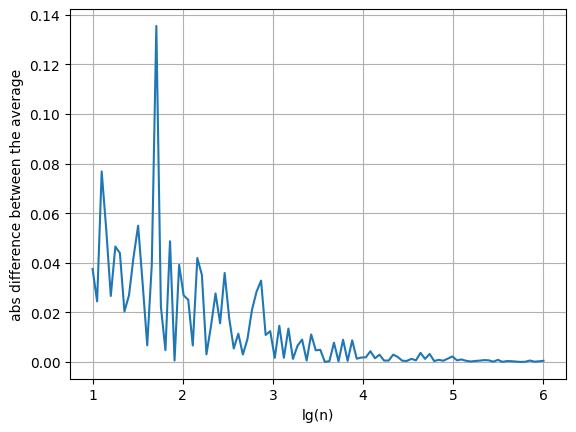

In [ ]:
fig, ax = plt.subplots()
ax.plot(grid, mean_arr)
ax.grid(True)
ax.set_xlabel('lg(n)')
ax.set_ylabel('abs difference between the average')

Text(0, 0.5, 'abs difference between the var')

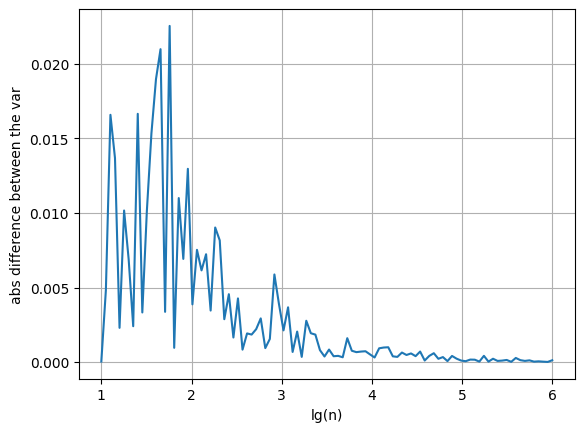

In [ ]:
fig, ax = plt.subplots()
ax.plot(grid, var_arr)
ax.grid(True)
ax.set_xlabel('lg(n)')
ax.set_ylabel('abs difference between the var')



---


**3-е задание**


---

1) Построить датчик экспоненциального распределения. Проверить для данного распределения свойство отсутствия памяти. Пусть $X_1,X_2,\ldots,X_n$ - независимо экспоненциально распределённые с.в. с параметрами $\lambda_1,\lambda_2,\ldots \lambda_n$ соответственно. Найти распределение случайной величины $Y = min(X_1,X_2,\ldots,X_n)$.

Рассмотрим $\eta = \frac{-ln(\xi)}{\lambda},\ \xi ∼ U[0,1],\ λ > 0$:
$$
F_\eta(x) = P\left(\frac{-ln(\xi)}{\lambda} \leqslant x\right) = P(ln(\xi) \geqslant -\lambda x) = P(\xi \geqslant e^{-\lambda x}) = 1 - P(\xi \leqslant e^{-\lambda x}) = 1 - F_\xi(e^{-\lambda x}).
$$$$
F_\eta(x) = \left\{
    \begin{array}\\
        1, & \mbox e^{-\lambda x} < 0,\\
        1 - e^{-\lambda x}, & \mbox e^{-\lambda x} \in [0,1],\\
        0, & \mbox e^{-\lambda x} > 1,
    \end{array}
\right. ⇒ F_\eta(x) = \left\{
    \begin{array}\\
        1 - e^{-\lambda x}, & \mbox x \geqslant 0,\\
        0, & \mbox x < 0.
    \end{array}
\right.
$$
Таким образом $\eta \sim Exp(λ) $, заметим, что к аналогичному результату можно было прийти через теорему об обратной функции к функции распределения.

In [ ]:
def gen_Exponential(lambd: float = 1, n: int = 1):
  n = int(n)
  if n <= 0 or lambd <= 0:
      raise ValueError("n and lambda must be a positive integer and float")
  return (-1) * np.log(np.random.random(n)) / lambd

In [ ]:
lambd = 1
n = 100000
cut = 3

In [ ]:
res = gen_Exponential(lambd, n)
res.sort()
x1 = res
y1 = (np.arange(n) + 1) / n
x2 = x1[np.where(x1 > cut)] - cut
y2 = (np.arange(x2.shape[0]) + 1) / x2.shape[0]

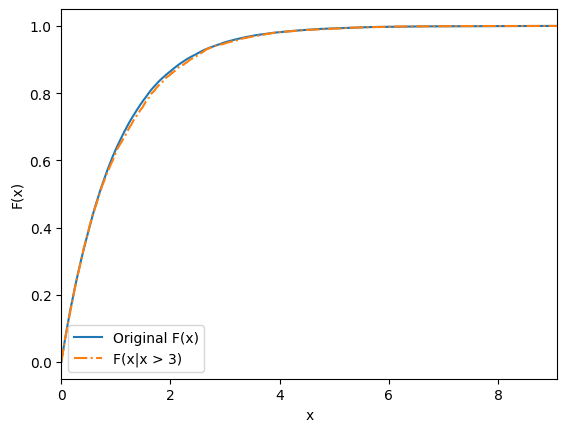

In [ ]:
fig, ax = plt.subplots()
ax.plot(x1, y1, label='Original F(x)')
ax.plot(x2, y2, '-.', label=f'F(x|x > {cut})')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.xlim([0, x1[(1 - y1 < 0.0001).argmax()]])
plt.legend()

Вычислим теоретическое значение функции распределения с.в. Y:
$$
F_Y(x) = P(Y \leqslant x) = 1 - P(Y > x) = 1 - P(min_{i\in \overline {1,n}} X_i > x) = 1 - \prod\limits_{i=1}^{n}P(X_i > x) = 1 - \prod\limits_{i=1}^{n}(1 - P(X_i \leqslant x)) = 1 - \prod\limits_{i=1}^{n}(1 - F_{X_i}(x)) = 1 - \prod\limits_{i=1}^{n}e^{-\lambda_i x}.
$$



Проверим эмпирически:

In [ ]:
lambd = np.arange(4) + 1
res = []
n = 1000

In [ ]:
for lamb in lambd:
  res.append(gen_Exponential(lamb, n))
res = np.min(res, axis=0)
res.sort()
x = (np.arange(n)+1)/n
y = (np.arange(n)+1)/n
F = 1 - np.exp(-lambd[0] * y)* np.exp(-lambd[1] * y) * np.exp(-lambd[2] * y) * np.exp(-lambd[3] * y)

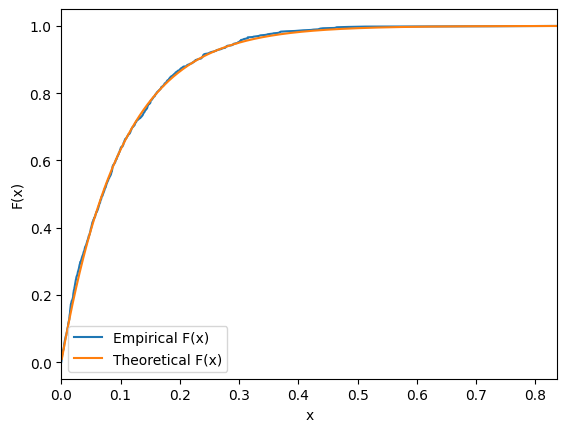

In [ ]:
fig, ax = plt.subplots()
ax.plot(res, y, label='Empirical F(x)')
ax.plot(x, F, label='Theoretical F(x)')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.xlim([0, res[(1 - y < 0.001).argmax()]])
plt.legend()

2) На основе датчика экспоненциального распределения построить датчик пуассоновского распределения.

Пусть $\eta_i \sim Exp(λ), i = \overline{1,∞}$,
тогда если $
\xi = max\left\{n : \sum_{i=1}^{n} \eta_i < 1\right\} ⇒ \xi \sim Pois(λ)$, если $\eta_1 > 1,то\ \xi = 0
$

In [ ]:
def  gen_Poisson(lambd: float = 1, n: int = 1):
        if n <= 0 and lambd <= 0:
            raise ValueError("n and lambda must be a positive integer and float")
        max1 = 0
        sums = np.zeros(n)
        res = np.ones(n) * -1
        while np.min(res) < 0:
            sums += gen_Exponential(lambd, n)
            res =  (res < 0) * ((sums >= 1) * max1 + (sums < 1) * res) + (res >= 0) * res
            max1 += 1
        return res


In [ ]:
n = 100000
lambd = 4

In [ ]:
res = gen_Poisson(lambd, n)
x, y = np.unique(res, return_counts=True)
y = y / n

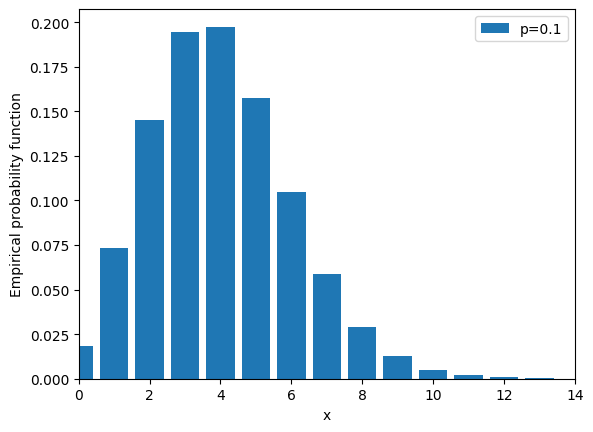

In [ ]:
plot_distribution(x, y, x[(y >= 0.0001).argmin()], 'x')

3) Построить датчик пуассоновского распределения как предел биномиального распределения. С помощью критерия хи-квадрат Пирсона убедиться, что получен датчик распределения Пуассона.

$$
P(\xi = k) = C_n^kp^k(1-p)^{n-k}\to\frac{e^{-\lambda}\lambda^k}{k!}.
$$

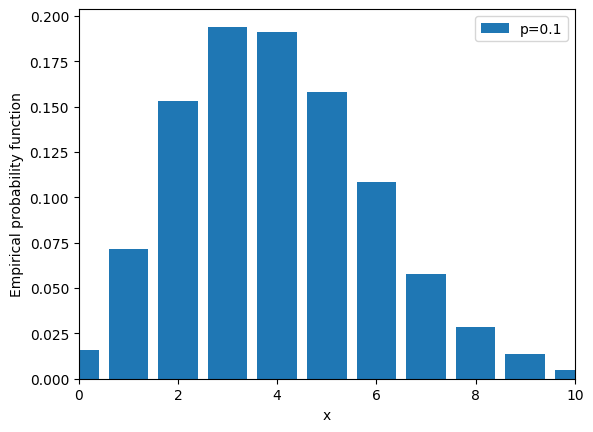

In [ ]:
lambd = 4
n = 10000
res = gen_Binomial(n, lambd/n, n)
x, y = np.unique(res, return_counts=True)
y = y / n
plot_distribution(x, y, x[(y > 0.01).argmin()], 'x')

In [ ]:
alpha = 0.05
factorials = np.array([np.math.factorial(k) for k in range(len(y))])
# theo distr
dist = np.exp(-lambd) * np.power(np.ones(len(y)) * lambd, np.arange(len(y))) / factorials
chi2_alpha = scipy.stats.chi2.ppf(1-alpha, len(y) - 1)
chi2_n = n * np.sum(np.power(y - dist, 2) / dist)

print(chi2_n < chi2_alpha)


True


4) Построить датчик стандартного нормального распределения методом моделирования случайных величин парами с переходом в полярные координаты. Проверить при помощи t-критерия Стьюдента равенство математических ожиданий, а при помощи критерия Фишера равенство дисперсий.

Пусть $\eta,\ \xi$ - независимые одинаково стандартно нормально распределённые случайные величины. Тогда их можно представить в виде:
$$
\eta = \sqrt{w}cos(\varphi), \\
\xi = \sqrt{w}sin(\varphi),
$$
где $w \sim Exp(0.5), \varphi \sim U[0, 2\pi]$.\
$\textbf{Идея доказательства:}$
$$
P(\eta < x, \xi < y) = \frac{1}{2\pi}∫\limits_{\infty}^{x}∫\limits_{\infty}^{y}{e^{-\frac{x_1^2+y_1^2}{2}}}dx_1dy_1 = \{переход\ в\ полярные\ координаты\}=
\frac{1}{2\pi}\iint\limits_{cos(\varphi)r<x\\sin(\varphi)r<x}r e^{-\frac{r^2}{2}}drdφ=
\frac{1}{4\pi}\iint\limits_{cos(\sqrt{\omega})r<x\\sin(\sqrt{\omega})r<x}r e^{-\frac{ω}{2}}d\omega dφ \\
P(\eta < x, \xi < y) = \frac{1}{\sqrt{2\pi}}\int\limits_{\infty}^{x}{e^{-\frac{x_1^2}{2}}}dx_1\frac{1}{\sqrt{2\pi}}\int\limits_{\infty}^{y}{e^{-\frac{y_1^2}{2}}}dy_1 = P(\eta < x) P(\xi < y).
$$

In [ ]:
def gen_Normal(n):
        if n <= 0:
            raise ValueError('n must be a positive integer.')
        res = np.sqrt(gen_Exponential(0.5, int(n))) * np.cos(2 * np.pi * np.random.random(n))
        return res

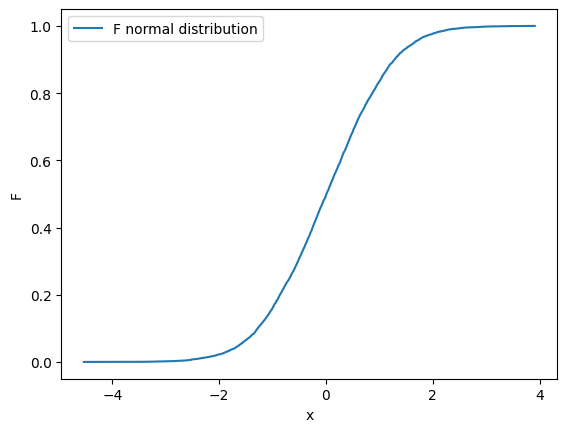

In [ ]:
n = 10000
res= gen_Normal(n)
res.sort()
y = (np.arange(n) + 1)/ n
fig, ax = plt.subplots()
ax.plot(res, y, label='F normal distribution')
ax.set_xlabel('x')
ax.set_ylabel('F')
plt.legend()

In [ ]:
alpha = 0.05
t_value = np.mean(res) / np.sqrt(np.var(res))
left_value = scipy.stats.t.ppf(alpha/2, n-1)
right_value = - left_value
print(left_value, t_value, right_value)

-1.960201263621358 0.008556497157494637 1.960201263621358


In [ ]:
alpha = 0.05
m = 10000
F_value = np.var(res)
left_value = scipy.stats.f.ppf(q=alpha/2, dfn=n-1, dfd=m-1)
right_value = scipy.stats.f.ppf(q=1-alpha/2, dfn=n-1, dfd=m-1)
print(left_value, F_value, right_value)

0.9615550367713881 1.0139990499912677 1.0399820725371045




---


**4-е задание**


---
1) Построить датчик распределения Коши.


В этот раз воспользуемся теоремой об обратной функции:\
$\textbf{Теорема:}$ Если функция F(x) непрерывна и монотонно возрастает на $R$, причем $\lim\limits_{x →-∞} F(x) = 0$,$\lim\limits_{x →+∞} F(x) = 1$, случайная величина $Y \sim U[0,1]$, то случайная величина $X = F^{-1}(Y)$ имеет функцию распределения $F_X(x) = F(x)$.\
Т.о.:
$$
F_\xi(x) = \frac{1}{\pi}arctg\left(\dfrac{x-x_0}{γ}\right) + \dfrac{1}{2}
$$

$F_\xi(x)$  - функция распределения Коши,  удовлетворяет условиям теоремы.
$$
F^{-1}_\xi(x) = x_0 + γ tg\left( π \left( x- \dfrac{1}{2}\right)\right)
$$
$X = F^{-1}(Y) \sim C(x_0, γ)$, где $Y \sim U[0,1]$

In [ ]:
def gen_Cauchy(n = 1, x0 = 0, gamma=1):
  if n <= 0 or gamma <= 0:
    raise ValueError('n and gamma must be a positive integer.')
  res = x0 + gamma * np.tan(np.pi * (np.random.random(n) - 1/2))
  return res

In [ ]:
x0 = 0
gamma = 1
n = 100000

In [ ]:
res = gen_Cauchy(n, x0, gamma)
res.sort()
x = res
y = (np.arange(n) + 1)/n
th = (1 / np.pi) * np.arctan((x - x0) / gamma) + 1/2

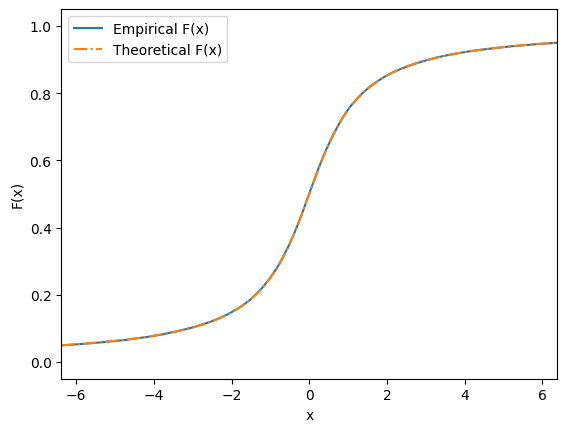

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, label='Empirical F(x)')
ax.plot(x, th, '-.', label='Theoretical F(x)')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
lim =x[(1 - y < 0.05).argmax()]
plt.xlim(-lim, lim)
plt.legend()

2) На основе датчика распределения Коши с помощью метода фон Неймана построить датчик стандартного нормального распределения. При помощи функции normal probability plot убедиться в корректности построенного датчика и обосновать наблюдаемую линейную зависимость.

$\textbf{Метод фон Неймана:}$\
Пусть имеются функции плотности двух распределений $p_1(x), p_2(x)$. Тогда проверяется существование константы k, такой, что: $kp_1(x) \geqslant p_2(x)$ на объединении всех носителей плотностей. Пусть такое $k$ существует,
тогда построим случайную величину $\xi$ по следующему алгоритму: \
(a) С помощью датчика c плотностью  $p_1$, генерируется число $x$. \
(b) В полученной точке вычисляется отношение $V = \frac{p_2(x)}{kp_1(x)}.$\
(c) Генерируется случайная величина $\eta \sim Bern(V)$. Если $\eta = 1$, то полагаем $\xi=x$, иначе повторяем алгоритм с шага (1).\
Заметим что можно получить k из следующих соображений:
$$ p_1(x) = \frac{1}{\pi\left(1 + x^2\right)},\ p_2(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}}$$

$$
\frac{p_1(x)}{p_2(x)} = \sqrt{\frac{\pi}{2}} e^{\frac{-x^2}{2}}\left(1+x^2\right).
$$
Рассмотрим функцию:
$$
f(t) = e^{-t} (1+2t), ~ t \geqslant0.
$$
Вычислим её первую и вторую производную:
$$
f'(t) = e^{-t}(1-2t).
$$
$$
f''(t) = -e^{-t}(1-2t) - 2e^{-t}.
$$
$$
\exists !t = \dfrac{1}{2}: f'(t) = 0,\ f''(t) < 0 ⇒ t = argmax_{x\in R}(f(x))
$$

Тогда:
$$
\sup_x \left(\frac{p_1(x)}{p_2(x)}\right) = \sqrt{\frac{\pi}{2}} f\left(\frac{1}{2}\right) = \sqrt{\frac{2\pi}{e}}.
$$
Отсюда:
$$
\exists k^* = \sqrt{\frac{2\pi}{e}}: k^*p_1(x) \geqslant p_2(x)
$$
Т.к. $\exists k^*$ можно реализовать данный алгоритм.

In [ ]:
def gen_normVonNeumann(n: int):

        if n <= 0:
            raise ValueError('n and gamma must be a positive integer.')

        index = 0
        res = np.zeros(n)
        while index < n:
            x = gen_Cauchy()
            v = np.sqrt(np.e) / 2 * (np.exp(-np.power(x, 2)/2) * (1 + np.power(x,2)))
            value = gen_Bernoulli(v)
            if value:
                res[index] = x
                index += 1
        return res

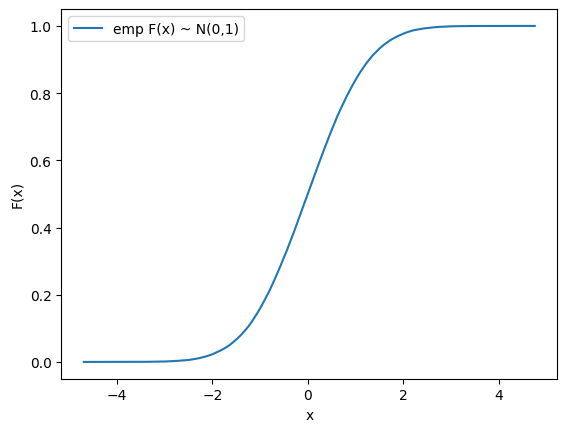

In [ ]:
n = 100000
res = gen_normVonNeumann(n)
res.sort()
x = res
y = (np.arange(n) + 1)/n

fig, ax = plt.subplots()
ax.plot(x, y, label='emp F(x) ~ N(0,1)')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.legend()

((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155]),
  array([-4.69172704, -4.48564477, -4.39672742, ...,  4.49401545,
          4.58744548,  4.74854891])),
 (1.0016696277014774, -0.001631036721761483, 0.9999809418015506))

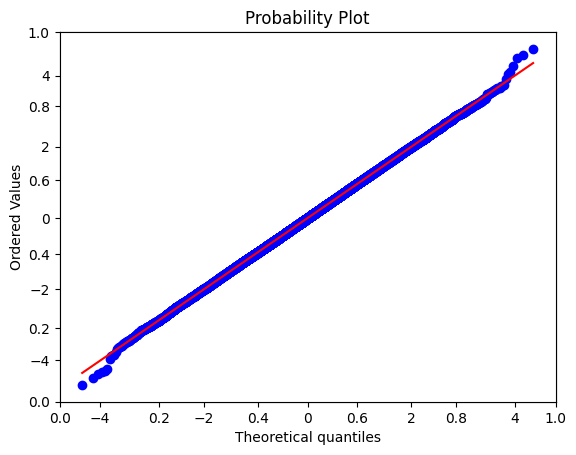

In [ ]:
fig, ax = plt.subplots()
ax = fig.add_subplot()
scipy.stats.probplot(res, plot=ax)

In [ ]:
num_tries = 15
Array = np.logspace(1, 4, num_tries)
t1 = np.zeros(num_tries)
t2 = np.zeros(num_tries)

for i in range(num_tries):
    n = int(Array[i])
    t = time.time()
    res1 = gen_Normal(n)
    t1[i] = time.time() - t
    t = time.time()
    res2 = gen_normVonNeumann(n)
    t2[i] = time.time() - t

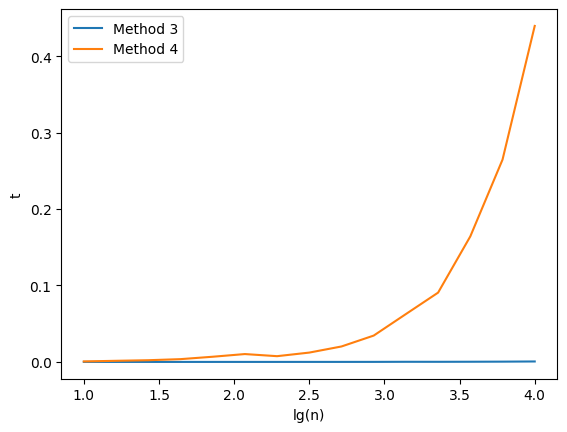

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(1, 4, num_tries), t1, label='Method 3')
ax.plot(np.linspace(1, 4, num_tries), t2, label='Method 4')
ax.set_xlabel('lg(n)')
ax.set_ylabel('t')
plt.legend()



---


**Задание 5**


---



1) Пусть $X_i \sim N(\mu, \sigma^2).$ Убедиться эмпирически в справедливости ЗБЧ И ЦПТ, т.е. исследовать поведение суммы $S_n$ и эмпирического распределения величины
$$
\sqrt{n}\left(\frac{S_n}{n} - a\right).
$$

In [ ]:
num_tries = 100
mu = 5
sigma = 3
arr = np.logspace(1, 6, num_tries)
results = np.zeros(num_tries)
for i in range(num_tries):
    n = int(arr[i])
    x = mu + sigma * gen_Normal(n)
    results[i] = np.mean(x)

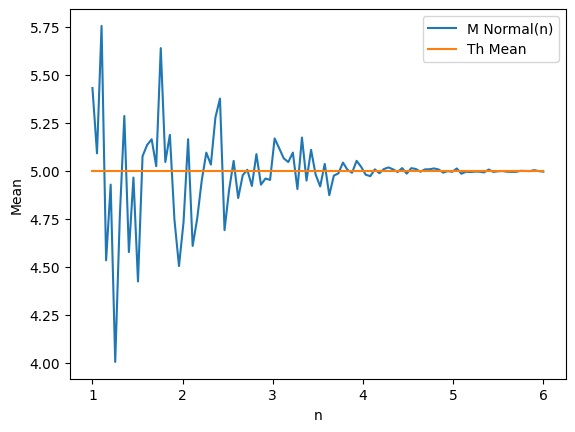

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(1, 6, num_tries), results, label='M Normal(n)')
ax.plot(np.linspace(1, 6, num_tries), np.ones(num_tries)* 5, label='Th Mean')
ax.set_xlabel('n')
ax.set_ylabel('Mean')
plt.legend()

In [ ]:
num_tries = 10000
mu = 5
sigma = 3
n = 10000
results = np.zeros(num_tries)
x = (mu + sigma * gen_Normal(n*num_tries)).reshape(num_tries, n)
z = np.sqrt(n) * (np.mean(x, axis=1) - mu)
z.sort()
y_th = 1/2 * (1 + scipy.special.erf((z) / np.sqrt(2*sigma**2)))
y_pr = np.arange(1,num_tries+1)/num_tries

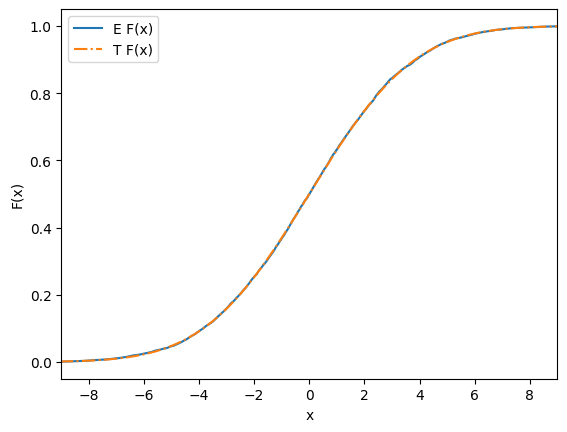

In [ ]:
fig, ax = plt.subplots()
ax.plot(z, y_pr, label='E F(x)')
ax.plot(z, y_th, '-.', label='T F(x)')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.xlim([-3 * sigma, 3 * sigma])
plt.legend()

2) Считая $\mu$ и $\sigma^2$ неизвестными, для пункта 1 построить доверительные интервалы среднего и дисперсии.

Пусть дана выборка н.о.р.с.в. $X_1, ... X_n$ с неизвестным средним $\mu$ и неизвестной дисперсией $\sigma^2$. Рассмотрим величину $S_n = \sum_{i=1}^{n}{X_i}$. Положим $\overline X = \frac{S_n}{n}$ - выборочное среднее, $S^2 = \frac{1}{n-1}\sum_{i=1}^{n}{\left(X_i-\overline X\right)^2}$ - несмещённая оценка дисперсии.\
Построим доверительный интервал для неизвестного матожидания $\mu$.\
С. в. $T = \sqrt{n}\frac{Y_n - \mu}{S}$ имеет распределение Стьюдента с $n-1$ степенью свободы. \
Тогда:
$$
P\left(-t_{n-1, 1-\frac{\alpha}{2}} \leqslant T \leqslant t_{n-1, 1-\frac{\alpha}{2}}\right) = 1 - \alpha.
$$
Где $t_{n-1, 1-\frac{\alpha}{2}}$ - квантиль порядка $ 1 - \frac{\alpha}{2}$ распределения Стьюдента.\
Подставляем $T$:
$$
P\left(\overline X - \frac{S}{\sqrt{n}}t_{n-1, 1-\frac{\alpha}{2}} \leqslant \mu \leqslant \overline X + \frac{S}{\sqrt{n}}t_{n-1, 1-\frac{\alpha}{2}}\right) = 1 - \alpha.
$$
Используя **теорему Фишера**:\
*Пусть $X1, . . . , Xn ∼ N(μ, σ^2)$ — независимая выборка, тогда
случайная величина
$$
H = \frac{(n − 1)S^2}{σ^2}
$$
имеет распределение $χ^2$ с n − 1 степенями свободы*.
Можно получить аналогичный результат для дисперсии:
$$
P\left(\frac{(n-1)S^2}{\chi^2_{n-1, \frac{1+\alpha}{2}}} \leqslant \sigma^2 \leqslant \frac{(n-1)S^2}{\chi^2_{n-1, \frac{1-\alpha}{2}}}\right) = \alpha.
$$


In [ ]:
n = 100000
alpha = 0.05
sigma = 2
mu = 3
x = mu + sigma * gen_Normal(n)
x.sort()
y = np.mean(x)
s = np.sqrt(np.var(x) * (n/(n-1)))
t_value = scipy.stats.t.ppf(1-alpha/2,n-1)
x_left = y - s*t_value/np.sqrt(n)
x_right = y + s*t_value/np.sqrt(n)
print(x_left, y, x_right)


2.9967791883579227 3.009147427141455 3.0215156659249875


In [ ]:
num_tries = 100
alpha = 0.05
mu = 5
sigma = 3

In [ ]:
arr = np.logspace(1, 6, num_tries)
left = np.zeros(num_tries)
mean = np.zeros(num_tries)
right = np.zeros(num_tries)
for i in range(num_tries):
    n = int(arr[i])
    x = mu + sigma * gen_Normal(n)
    x.sort()
    y = np.mean(x)
    s = np.sqrt(np.var(x) * (n/(n-1)))
    t_value = scipy.stats.t.ppf(1-alpha/2,n-1)
    x_left = y - s*t_value/np.sqrt(n)
    x_right = y + s*t_value/np.sqrt(n)
    left[i] = x_left
    mean[i] = np.mean(x)
    right[i] = x_right

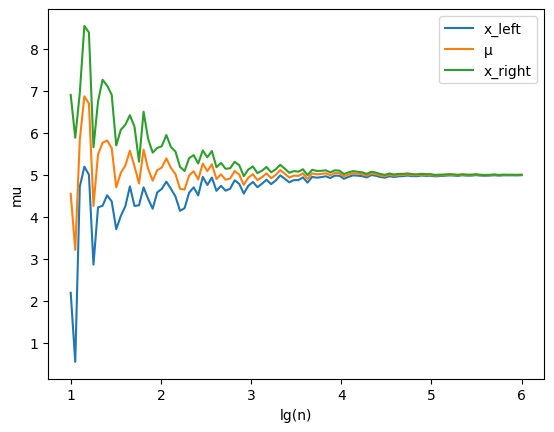

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(1, 6, num_tries), left, label='x_left')
ax.plot(np.linspace(1, 6, num_tries), mean, label='μ')
ax.plot(np.linspace(1, 6, num_tries), right, label='x_right')
ax.set_xlabel('lg(n)')
ax.set_ylabel('mu')
plt.legend()

In [ ]:
n = 100000
alpha = 0.95
sigma = 2
mu = 3

In [ ]:
num_tries = 100
arr = np.logspace(1, 6, num_tries)
left = np.zeros(num_tries)
disp = np.zeros(num_tries)
right = np.zeros(num_tries)
for i in range(num_tries):
    n = int(arr[i])
    x = mu + sigma * gen_Normal(n)
    x.sort()
    y = np.mean(x)
    s = np.sqrt(np.var(x) * (n/(n-1)))
    chi2_1 = scipy.stats.chi2.ppf((1-alpha)/2, n-1)
    chi2_2 = scipy.stats.chi2.ppf((1+alpha)/2, n-1)
    x_left = (n-1)*s**2 / chi2_2
    x_right = (n-1)*s**2 / chi2_1
    left[i] = x_left
    disp[i] = np.var(x)
    right[i] = x_right

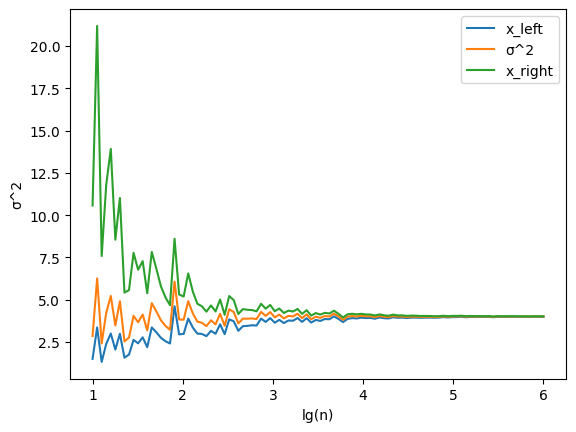

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(1, 6, num_tries), left, label='x_left')
ax.plot(np.linspace(1, 6, num_tries), disp, label='σ^2')
ax.plot(np.linspace(1, 6, num_tries), right, label='x_right')
ax.set_xlabel('lg(n)')
ax.set_ylabel('σ^2')
plt.legend()

3) Пусть $X_i \sim K(a,b)$ имеет распределение Коши со сдвигом $a$ и масштабом $b$. Проверить эмпирически, как ведут себя суммы $S_n/n$. Результат объяснить, а также найти закон распределения данных сумм.

In [ ]:
a = 1
b = 2
num_tries = 100
Array = np.logspace(1, 6, num_tries)
y = np.zeros(num_tries)
for i in range(Array.shape[0]):
    n = int(Array[i])
    res = a + b * gen_Cauchy(n)
    y[i] = np.mean(res)

Text(0, 0.5, 'Sn/n')

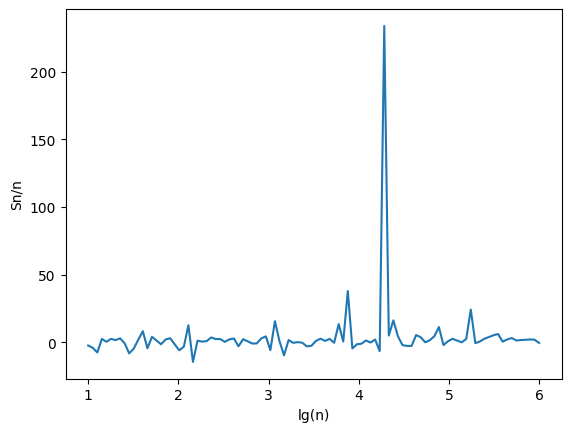

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.log10(Array), y)
ax.set_xlabel('lg(n)')
ax.set_ylabel('Sn/n')



---


**Задание 6**

---



1) Посчитать интеграл
$$
\int\limits^{\infty}_{-\infty}\int\limits^{\infty}_{-\infty}{\cdots}\int\limits_{-\infty}^{\infty}\frac{e^{-\left(x_1^2+\ldots x_{10}^2 + \frac{1}{2^7\cdot x_1^2\ldots x_{10}^2}\right)}}{x_1^2\ldots x_{10}^2}dx_1dx_2\ldots dx_{10}.
$$
 - методом Монте-Карло \
 - методом квадратур, сводя задачу к вычислению собственного интеграла Римана\
2) Для каждого случая оценить точность вычислений

Т. к. исходный интеграл представим в виде:
$$
I = \int\limits_{U}^{}f(x)p(x)dx,
$$
где $f(x) = \frac{exp\left(\frac{-1}{2^7\cdot x_1^2\ldots x_{10}^2}\right)}{x_1^2\ldots x_{10}^2}\pi^5$, а $p(x) = \frac{e^{-\left(x_1^2+\ldots x_{10}^2\right) }}{\pi^5}$.\
По определению математического ожидания:
$$
\mathbf{E}(f(x_1,...,x_{10})) = I.
$$
При достаточно больших n:
$$
\mathbf{E}(f(x_1,...,x_{10})) \approx \frac{\sum\limits_{i=1}^{n}f(\xi_i)}{n}.
$$
Из этих соображений найдем $I$.

In [ ]:
def f(x):
    return np.pi**5 * np.exp(-1/(2**7 * np.prod(np.power(x, 2), axis=0)))/ np.prod(np.power(x, 2), axis=0)

In [ ]:
size = 10

a = np.zeros(size)
res = np.zeros(size)
for i in range(size):
    n = 10**6
    mean = np.zeros(size)
    cov = np.diag(np.diag(np.ones([size, size]))) * 1/2
    xi = np.random.multivariate_normal(mean, cov, n).T
    res[i] = np.mean(f(xi))

In [ ]:
res1 = res

In [ ]:
res1.max() - res1.min()

3.066446336772259

Теперь проверим метод квадратур (если быть более конкретным, методу прямоугольников). Сведём к вычислению интеграла Римана по отрезку $[-1,1]$, проведя замену: $x_i = tg\left(\frac{\pi}{2}\varphi_i\right)$. Разобьём отрезок $[-1, 1]$ по каждой оси на $N$ равных частей и построим таким образом сетку, с помощью которой будем аппроксимировать значение интеграла.

In [ ]:
import numpy as np

In [ ]:
def F(x):
    return (np.pi/2)**10 * np.exp(-(np.sum(np.power(np.tan(np.pi/2*x), 2), axis=0) + 1/(2**7*np.prod(np.power(np.tan(np.pi/2*x), 2), axis=0)))) / np.prod(np.power(np.sin(np.pi/2*x),2), axis=0)

In [ ]:
V = 2**10
N = 5
max_column = 9

grid = np.zeros((V, V))

for num_column in range(max_column + 1):
    matrix = np.repeat(np.arange(N), N**(max_column  - num_column)).reshape(-1, 1)
    col = np.repeat(matrix, N**num_column, axis=1).T.ravel().reshape(-1,1)
    if num_column == 0:
        grid = col
    else:
        grid = np.hstack((grid, col ))

grid = (grid / N * 2 - 1).T

In [ ]:
res = V * np.mean(F(grid))
res

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


645.3526147125427